In [8]:
import numpy as np
import matplotlib.pyplot as plt

from spectral_cube import SpectralCube
import astropy.units as u
import math
#%matplotlib notebook

In [9]:
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

In [10]:
X = np.linspace(0,20,100)
Amp = 2.
Center = 13.
Width = 5

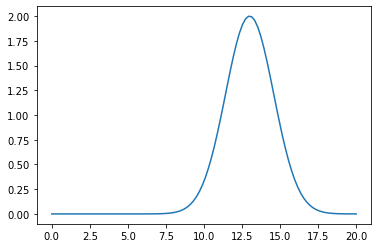

In [11]:
plt.plot(X, gaussian(X,Amp,Center,Width))

Text(0, 0.5, 'T (K)')

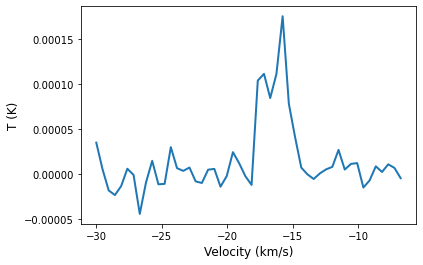

In [12]:
GlobB = 'GlobB_HCOp.image.pbcor.fits'
cube = SpectralCube.read(GlobB)
cube_kms = cube.with_spectral_unit(u.km/u.s, velocity_convention = "optical")

spec = np.mean(cube_kms, axis = (1,2))

fig, ax = plt.subplots()
ax.plot(cube_kms.spectral_axis, spec, lw = 2)
ax.set_xlabel("Velocity (km/s)", fontsize = 12)
ax.set_ylabel("T (K)", fontsize = 12)

In [13]:
from scipy.signal import find_peaks

Dist = cube_kms.spectral_axis
PIXVAL = spec

peaks, properties = find_peaks(PIXVAL, height = np.amax(np.array(PIXVAL)), width = 0.5) #Requirements to identify peaks
prominences = properties["prominences"] #vertical distance between the peak and its lowest contour line
heights = properties["peak_heights"]
widths = properties["widths"] #width of a peak in samples
width_heights = properties["width_heights"] #height of the contour lines at which the widths where evaluated
#print(peaks, widths, width_heights, _["peak_heights"])
#print(Dist)

Peak 1 Height: 1.76E-04(Jy/beam km/s)
Peak 1 Velocity: -15.78 km/s
Peak 1 Width: 5.18 km/s
30


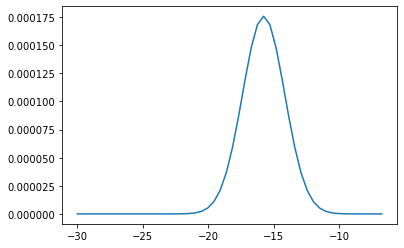

In [14]:
for i in range(len(peaks)):
    plt.plot(Dist, gaussian(np.array(Dist),heights[i],np.array(Dist)[peaks][i],widths[i]))
    print('Peak '+str(i+1)+' Height: %1.2E' %(heights[i])+'(Jy/beam km/s)')
    print('Peak '+str(i+1)+' Velocity: %1.2f km/s' %( np.array(Dist)[peaks][i]))
    print('Peak '+str(i+1)+' Width: %1.2f km/s' %(widths[i]))
    print(peaks[i])